In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/model_outcome.csv')
data.head()

,index,class,predicted_prob
0,1,0,0.592837
1,2,1,0.624829
2,3,0,0.073848
3,4,1,0.544891
4,5,0,0.015118


#### Sensitivity, also called True positive rate (TPR)  = $\frac{True\, Positives}{Total\, Positives}$
#### Specificity, also called True negative rate (TNR)=  $\frac{True\, Negative}{Total\, Negatives}$
#### threshhold >=0.5

In [3]:
Sensitivity = len(data[(data['class'] == 1) & (data['predicted_prob'] >= 0.5)])/len(data[data['class'] == 1])
Specificity = len(data[(data['class'] == 0) & (data['predicted_prob'] < 0.5)])/len(data[data['class'] == 0])
print('Sensitivity of the model at the threshold >= 0.5:', Sensitivity)
print('Specificity of the model at the threshold >= 0.5:', Specificity)

Sensitivity of the model at the threshold >= 0.5: 0.8170731707317073
Specificity of the model at the threshold >= 0.5: 0.7578740157480315


In [4]:
thresholds = np.arange(0,1.05,0.05)

tpr = np.zeros(len(data))
fpr = np.zeros(len(data))

for i in range(len(thresholds)):
    tpr[i] = len(data[(data['class'] == 1) & (data['predicted_prob'] >=thresholds[i] )])/len(data[data['class'] == 1])
    fpr[i] = len(data[(data['class'] == 0) & (data['predicted_prob'] >=thresholds[i] )])/len(data[data['class'] == 0])
        
    

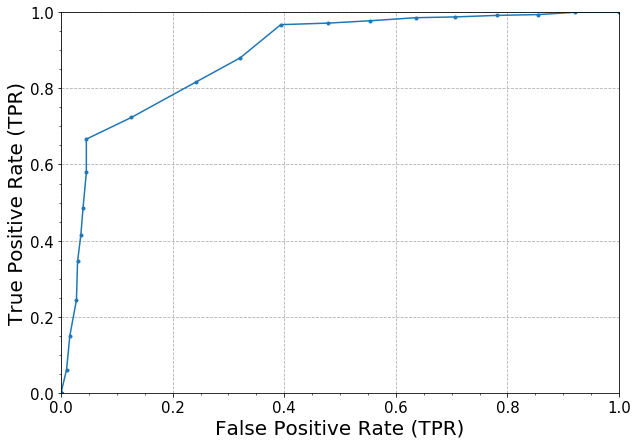

In [5]:
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,".-")
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.ylabel(r'True Positive Rate (TPR)' ,fontsize =20)
plt.xlabel(r'False Positive Rate (TPR)' ,fontsize =20)
plt.grid(linestyle ='--', alpha = 1.0)
plt.minorticks_on()

#### For area under curve, we just need to integrate TPR w.r.t. FPR
#### Make sure arrays are sorted so that numpy trapz doesn't thow out negative area

In [6]:
auc = np.trapz(tpr[np.argsort(fpr)],np.sort(fpr))
print("Area under the curve (AUC) of the model:",auc)

Area under the curve (AUC) of the model: 0.888551469176109
